In [1]:
import pandas as pd
import numpy as np
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_tree #requieres graphviz https://www.graphviz.org/
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
pd.set_option('display.max_columns',None)

In [78]:
df_clean = pd.read_excel("C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/clean_5.xlsx")

# df_clean.rename(columns={
#     'CURRENT_A_CALC':,
#  'CURRENT_B_CALC':,
#  'CURRENT_C_CALC':,
#  'CURRENT_D_CALC':,
#  'POWER_A':,
#  'POWER_B':,
#  'POWER_C':,
#  'POWER_D':,
#  'TEMPERATURE_A':,
#  'TEMPERATURE_B':,
#  'TEMPERATURE_C':,
#  'TEMPERATURE_D':,
#  'VOLTAGE_A':,
#  'VOLTAGE_B':,
#  'VOLTAGE_C':,
#  'VOLTAGE_D':,
# },inplace=True)
# df_clean['ciclo'] = df_clean.groupby(['bateria','fecha_exp'])['fecha_exp'].cumcount()+1
##df_clean.groupby('bateria')['ciclo'].describe()

def contar(data):
    cuenta = 1
    cuentas = []
    for i in range(0,(len(data))):
        if i>0:
            if data['bateria'][i]!=data['bateria'][i-1]:
                cuenta = 1
            elif data['fecha_exp'][i]!=data['fecha_exp'][i-1]:
                cuenta = cuenta + 1
        cuentas.append(cuenta)
    return cuentas
df_clean['ciclo'] = contar(df_clean)

lista_metroplus = df_clean[df_clean['lugar']=='metroplus']['fecha_exp'].unique()

In [79]:
variables_ciclo_inicial = [
    'distancia', 'vel_max', 'vel_prom',
    'ACCELERATION_X', 'ACCELERATION_Y', 'ACCELERATION_Z', 'CURRENT_A_CALC',
    'CURRENT_B_CALC', 'CURRENT_C_CALC', 'CURRENT_D_CALC', 'POWER_A',
    'POWER_B', 'POWER_C', 'POWER_D', 'TEMPERATURE_A', 'TEMPERATURE_B',
    'TEMPERATURE_C', 'TEMPERATURE_D', 'VOLTAGE_A', 'VOLTAGE_B', 'VOLTAGE_C',
    'VOLTAGE_D', 'ENV_HUMIDITY', 'ENV_TEMPERATURE','ciclo','bateria'
    ]
variables_ciclo = [x for x in variables_ciclo_inicial if x != 'bateria']

variables_sin_ciclo_inicial = [
    'distancia', 'vel_max', 'vel_prom',
    'ACCELERATION_X', 'ACCELERATION_Y', 'ACCELERATION_Z', 'CURRENT_A_CALC',
    'CURRENT_B_CALC', 'CURRENT_C_CALC', 'CURRENT_D_CALC', 'POWER_A',
    'POWER_B', 'POWER_C', 'POWER_D', 'TEMPERATURE_A', 'TEMPERATURE_B',
    'TEMPERATURE_C', 'TEMPERATURE_D', 'VOLTAGE_A', 'VOLTAGE_B', 'VOLTAGE_C',
    'VOLTAGE_D', 'ENV_HUMIDITY', 'ENV_TEMPERATURE','bateria'
    ]
variables_sin_ciclo = [x for x in variables_sin_ciclo_inicial if x != 'bateria']

# con ciclo

In [7]:
X.columns

Index(['distancia', 'vel_max', 'vel_prom', 'ACCELERATION_X', 'ACCELERATION_Y',
       'ACCELERATION_Z', 'CURRENT_A_CALC', 'CURRENT_B_CALC', 'CURRENT_C_CALC',
       'CURRENT_D_CALC', 'POWER_A', 'POWER_B', 'POWER_C', 'POWER_D',
       'TEMPERATURE_A', 'TEMPERATURE_B', 'TEMPERATURE_C', 'TEMPERATURE_D',
       'VOLTAGE_A', 'VOLTAGE_B', 'VOLTAGE_C', 'VOLTAGE_D', 'ENV_HUMIDITY',
       'ENV_TEMPERATURE', 'ciclo', 'bateria'],
      dtype='object')

In [80]:
X = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)][variables_ciclo_inicial]#[['CURRENT_A_CALC','POWER_A','TEMPERATURE_A','VOLTAGE_A']]
y = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)]['RUL_registro']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Min_Max=X.copy(deep=True)
X_Min_Max[X.columns] = scaler.fit_transform(X)
# X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,#X_Min_Max,
                                        y.values.reshape(-1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True,
                                        stratify = X['bateria']
                                    )
X_train.drop('bateria',axis=1,inplace=True)
X_test.drop('bateria',axis=1,inplace=True)

# define model
# model = XGBRegressor()
# # fit model
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# from sklearn.metrics import mean_squared_error

# print(np.sqrt(mean_squared_error(y_test, y_pred)))

# imp_features = model.feature_importances_
# # for i in imp_features:
#     # print(i.round(3))
# df_imp_features = pd.DataFrame({"features":variables_ciclo}).join(pd.DataFrame({"weights":imp_features}))
# display(df_imp_features.sort_values(by=['weights'], ascending=False))

# xgboost.plot_tree(model, num_trees=2)
# fig = plt.gcf()
# fig.set_size_inches(150, 100)
# fig.savefig('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/pruebas_variables/tree_ciclo.png')

In [81]:
X_train.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/X_train.xlsx',index=False)
pd.DataFrame(y_train).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/y_train.xlsx',index=False)
X_test.to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/X_test.xlsx',index=False)
pd.DataFrame(y_test).rename(columns={0:'RUL_registro'}).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/y_test.xlsx',index=False)

## SVR con ciclo

In [8]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
#Se crea una instancia de una SVR Regression
SVMR = SVR()

#Se establecen los hiperparámetros para el Kernel lineal
svm_linear = {'C': [0.1, 1, 3, 5, 10, 100],
              'kernel': ['linear']}

#Se establecen los hiperparámetros para el Kernel polinomico
svm_poly = {'C': [0.1, 1, 3, 5, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale'],
              'degree': [2, 3],
              'kernel': ['poly']}

#Se establecen los hiperparámetros para los kernels rbf y sigmoid
svm_others = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001,'auto', 'scale'],
              'kernel': [ 'rbf', 'sigmoid']}

#Se unen todos los hiperparametros en una lista de diccionarios
parameters = [svm_linear, svm_poly, svm_others]


# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(SVMR, param_grid=parameters, cv=5, verbose=3,n_jobs=18)

#Se entrena el GridSearchCV anterior
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 138 candidates, totalling 690 fits


KeyboardInterrupt: 

## GradientBoost con ciclo

### Afinamiento de parámetros

#### Learning rate

[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   13.2s remaining:   19.9s
[Parallel(n_jobs=18)]: Done   3 out of   5 | elapsed:   13.3s remaining:    8.8s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   13.5s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   12.9s remaining:   19.4s
[Parallel(n_jobs=18)]: Done   3 out of   5 | elapsed:   12.9s remaining:    8.6s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   13.0s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   13.0s remaining:   19.6s
[Parallel(n_jobs=18)]: Done   3 out of   5 | elapsed:   13.0s remaining:    8.7s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   13.1s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent wo

Mejor valor de learning_rate
0.55
CPU times: total: 2min 45s
Wall time: 9min 22s


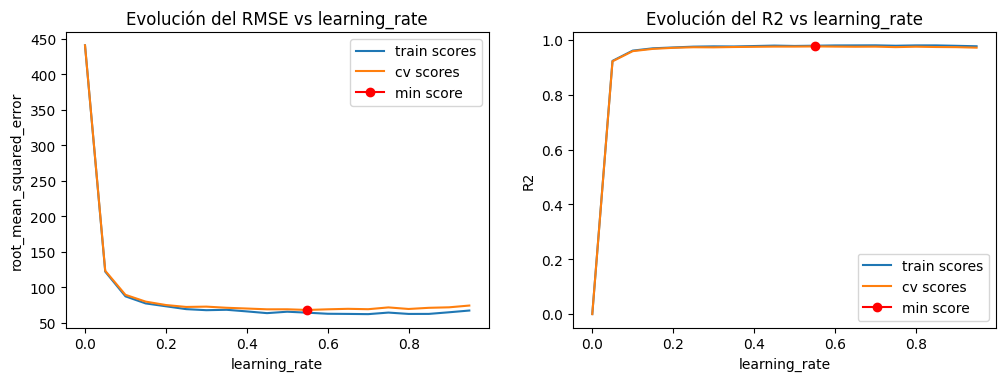

In [83]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange (0, 1, 0.05)
hiperparametro = 'learning_rate'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = GradientBoostingRegressor(
                learning_rate = elemento,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
                ,verbose=10
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="min score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### n_estimators

[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    7.2s remaining:   10.9s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    7.2s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   13.0s remaining:   19.5s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   13.1s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.9s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   24.6s remaining:   37.0s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   25.3s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parall

Mejor valor de n_estimators
300
CPU times: total: 1min 50s
Wall time: 4min 36s


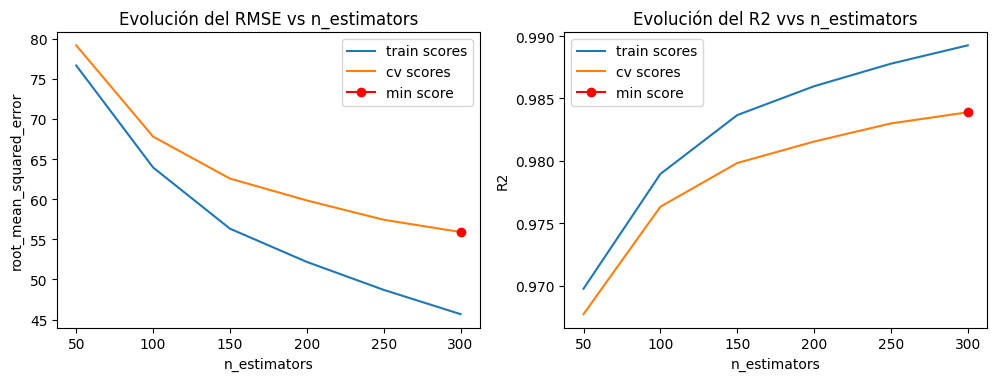

In [85]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(50,350,50)
hiperparametro = 'n_estimators'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in listado:

    modelo = GradientBoostingRegressor(
                n_estimators = n_estimators,
                learning_rate = 0.55,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
                ,verbose = 4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="min score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vvs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### max_depth

[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:    7.9s remaining:   11.9s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   18.6s remaining:   27.9s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   18.8s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   27.0s remaining:   40.5s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   27.2s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done   2 out of   5 | elapsed:   33.1s remaining:   49.8s
[Parallel(n_jobs=18)]: Done   5 out of   5 | elapsed:   33.4s finished
[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parall

Mejor valor de max_depth
7
CPU times: total: 3min 17s
Wall time: 8min 36s


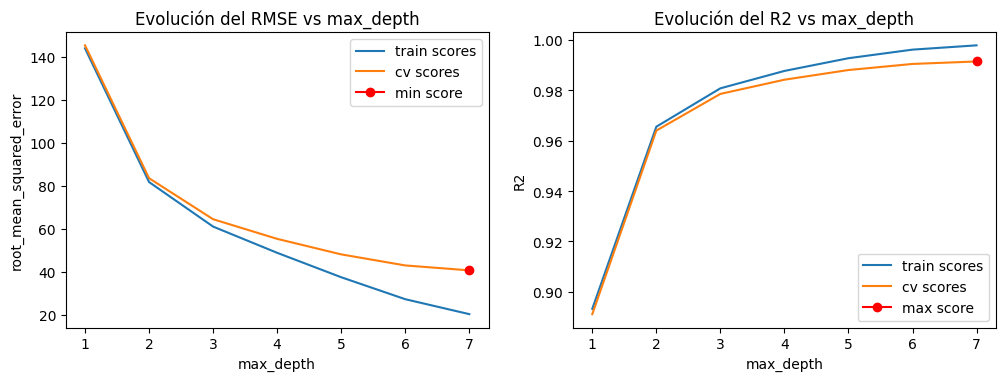

In [86]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(1,8,1)
hiperparametro = 'max_depth'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = GradientBoostingRegressor(
                n_estimators = 200,
                max_depth = elemento,
                learning_rate = 0.2,
                #n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
                ,verbose = 4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

### GridSearch

In [87]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
#Se crea una instancia de una GBR
GBR_GS = GradientBoostingRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.2,1,0.1)
        ,'n_estimators': range(20,250,50)
        ,'max_depth':range(1,8,1)
        }

scoring_list = ['neg_root_mean_squared_error', 'r2']


# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(GBR_GS, param_grid=params, cv=5, verbose=10,n_jobs=18,scoring=scoring_list, refit='neg_root_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
CPU times: total: 24.6 s
Wall time: 36min 11s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=18,
             param_grid={'learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(1, 8),
                         'n_estimators': range(20, 250, 50)},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'r2'], verbose=10)

In [92]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_root_mean_squared_error',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
34,86.256851,0.273948,0.046252,0.000418,0.2,7,220,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",-39.059875,-42.860317,-41.154188,-40.704173,-40.370515,-40.829814,1.231875,1,-18.104573,-17.693385,-18.665015,-17.789670,-17.656640,-17.981857,0.376214,0.992149,0.990562,0.991285,0.991493,0.991564,0.991410,0.000512,1,0.998313,0.998388,0.998206,0.998370,0.998398,0.998335,0.000071
33,67.055924,0.145850,0.037884,0.000595,0.2,7,170,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",-39.803342,-42.318676,-41.661430,-41.589190,-40.961016,-41.266731,0.848684,2,-21.202386,-21.128386,-21.732802,-20.848271,-20.877766,-21.157922,0.318656,0.991847,0.990799,0.991069,0.991119,0.991315,0.991230,0.000350,2,0.997686,0.997701,0.997568,0.997761,0.997760,0.997695,0.000070
29,73.817134,0.443444,0.040234,0.000948,0.2,6,220,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti...",-42.458360,-42.812457,-42.279023,-43.217215,-41.773343,-42.508080,0.487913,3,-26.375307,-25.452577,-26.221315,-25.356970,-25.612049,-25.803644,0.414903,0.990723,0.990583,0.990802,0.990410,0.990968,0.990697,0.000190,3,0.996419,0.996664,0.996460,0.996688,0.996628,0.996572,0.000110
32,47.686634,0.155657,0.028504,0.003610,0.2,7,120,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",-41.055886,-43.899070,-43.071728,-42.773443,-42.321574,-42.624340,0.937981,4,-25.619034,-26.295041,-26.631099,-25.079464,-25.262100,-25.777348,0.595732,0.991326,0.990099,0.990454,0.990606,0.990729,0.990643,0.000402,4,0.996622,0.996440,0.996349,0.996760,0.996720,0.996578,0.000159
69,85.553873,0.250139,0.044374,0.006150,0.3,7,220,"{'learning_rate': 0.30000000000000004, 'max_de...",-41.188019,-44.878590,-42.443302,-42.252408,-42.886465,-42.729757,1.210695,5,-14.071536,-14.168087,-13.891447,-13.327846,-14.414913,-13.974766,0.364942,0.991270,0.989652,0.990730,0.990833,0.990480,0.990593,0.000535,5,0.998981,0.998966,0.999007,0.999085,0.998932,0.998994,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1.044706,0.007748,0.003360,0.004887,0.6,1,20,"{'learning_rate': 0.6000000000000001, 'max_dep...",-198.636817,-200.343090,-199.804461,-199.469346,-200.764194,-199.803582,0.733062,276,-197.583460,-199.333152,-199.112500,-197.937520,-197.562275,-198.305781,0.763734,0.796954,0.793781,0.794571,0.795699,0.791369,0.794475,0.001886,276,0.799052,0.795397,0.795896,0.798195,0.799389,0.797586,0.001638
105,1.044603,0.004980,0.000000,0.000000,0.5,1,20,"{'learning_rate': 0.5000000000000001, 'max_dep...",-208.250763,-206.894040,-207.827526,-208.315357,-209.656101,-208.188757,0.892160,277,-207.181393,-206.817706,-207.179957,-206.671543,-205.969214,-206.763963,0.445052,0.776823,0.780074,0.777742,0.777177,0.772479,0.776859,0.002466,277,0.779055,0.779744,0.779022,0.779993,0.781953,0.779953,0.001069
70,1.044007,0.008316,0.010232,0.006938,0.4,1,20,"{'learning_rate': 0.4000000000000001, 'max_dep...",-219.379717,-219.499520,-220.800695,-220.778969,-222.190773,-220.529935,1.027470,278,-219.093123,-219.16

In [94]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_root_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_GBR_ciclo_20231025.xlsx')

In [95]:
# Se identifican los mejores hiperparámetros
best_params = grid_result.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 220}


In [96]:
from sklearn.model_selection import cross_validate
# Se crea un modelo SVR con los mejores hiperparámetros
best_gbr = GradientBoostingRegressor(random_state=0
                                     ,learning_rate=0.2
                                     ,max_depth=7
                                     ,n_estimators=220
                                     ,verbose=3
                                     )

# Se definen los Pliegues (Folks)
CV = 10


# Definición de metricas a evaluar el modelo
scoring = {
    'r2':'r2',
    'neg_mean_squared_error(MSE)': 'neg_mean_squared_error',
    'root_mean_squared_error(RMSE)': 'neg_root_mean_squared_error',
    'mean_absolute_error(MAE)': 'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error(MAPE)': 'neg_mean_absolute_percentage_error'
    }


#Se se ejecuta una validación cruzada utilizando las métricas definidas anteriormente
scores = cross_validate(best_gbr, X_Min_Max, y,cv=CV, scoring= scoring,n_jobs=-1)

In [97]:
pd.DataFrame(scores).mean()

fit_time                                           100.512755
score_time                                           0.016520
test_r2                                              0.773790
test_neg_mean_squared_error(MSE)                -44249.159332
test_root_mean_squared_error(RMSE)                -193.924141
test_mean_absolute_error(MAE)                     -142.790607
test_neg_mean_absolute_percentage_error(MAPE)       -0.591153
dtype: float64

## Adaboost con ciclo

In [115]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(random_state=0, n_estimators=100)
reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

### Afinamiento de parámetros

#### learning_rate

In [98]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================

train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange(0.1,1,0.1)
hiperparametro = 'learning_rate'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                # n_estimators = elemento,
                # max_depth = max_depth,
                learning_rate = elemento,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs = 18
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())



CPU times: total: 41 s
Wall time: 1min 40s


Mejor valor de learning_rate
0.9


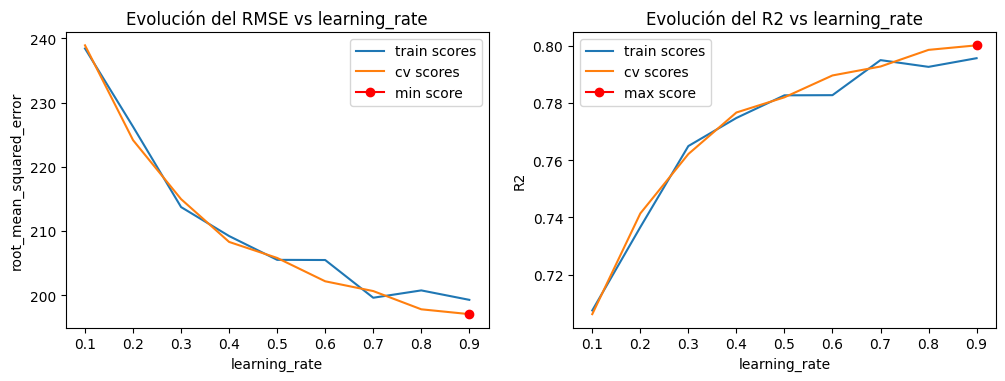

In [99]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### loss + learning rate

In [100]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = np.arange(0.1,1,0.1)
hiperparametro = 'learning_rate'


# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                # n_estimators = elemento,
                # max_depth = max_depth,
                learning_rate = elemento,
                random_state = 123
                ,loss='exponential'
             )

    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=18
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())



CPU times: total: 42.6 s
Wall time: 1min 37s


Mejor valor de learning_rate
0.9


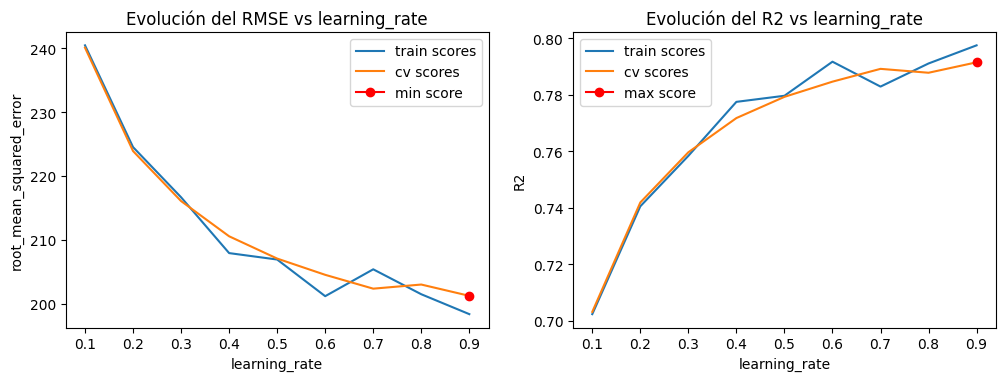

In [101]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

#### n_estimators

In [102]:
%%time
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score
train_scores_rmse = []
train_scores_r2 = []
cv_scores_rmse    = []
cv_scores_r2    = []

# Valores evaluados
listado = range(10,200,10)
hiperparametro = 'n_estimators'

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for elemento in listado:

    modelo = AdaBoostRegressor(
                n_estimators = elemento
                ,learning_rate = 0.8
                ,loss = 'exponential'
                # learning_rate = 0.6,
                ,random_state = 123
             )


    # Error de train
    modelo.fit(X_train, y_train.reshape(-1))
    predicciones = modelo.predict(X = X_train)
    rmse_train_score = mean_squared_error(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones,
            squared = False
           )
    r2_train_score = r2_score(
            y_true  = y_train.reshape(-1),
            y_pred  = predicciones
           )
    train_scores_rmse.append(rmse_train_score)
    train_scores_r2.append(r2_train_score)

    # Error de validación cruzada
    scores = cross_validate(
                estimator = modelo,
                X         = X_train,
                y         = y_train.reshape(-1),
                scoring   = ['neg_root_mean_squared_error','r2']
                # ,
                ,cv        = 5
                ,n_jobs=16
                ,verbose=4
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores_rmse.append(-1*scores['test_neg_root_mean_squared_error'].mean())
    cv_scores_r2.append(scores['test_r2'].mean())

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.8s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

CPU times: total: 2min 15s
Wall time: 5min 55s


Mejor valor de n_estimators
160


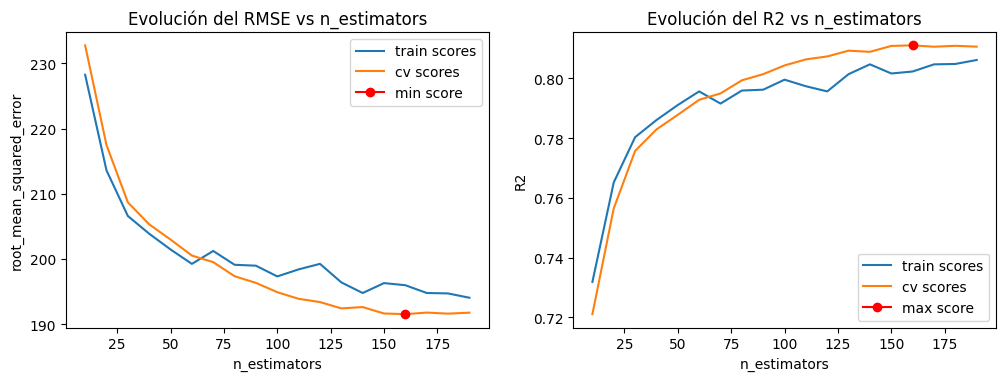

In [103]:
# Gráfico con la evolución de los errores

fig, ax  = plt.subplots(1,2,figsize=(2*6, 3.84))
ax[0].plot(listado, train_scores_rmse, label="train scores")
ax[0].plot(listado, cv_scores_rmse, label="cv scores")
ax[0].plot(listado[np.argmin(cv_scores_rmse)], min(cv_scores_rmse),marker='o', color = "red", label="min score")
ax[0].set_ylabel("root_mean_squared_error")
ax[0].set_xlabel(hiperparametro)
ax[0].set_title("Evolución del RMSE vs "+hiperparametro)
ax[0].legend()

ax[1].plot(listado, train_scores_r2, label="train scores")
ax[1].plot(listado, cv_scores_r2, label="cv scores")
ax[1].plot(listado[np.argmax(cv_scores_r2)], max(cv_scores_r2),marker='o', color = "red", label="max score")
ax[1].set_ylabel("R2")
ax[1].set_xlabel(hiperparametro)
ax[1].set_title("Evolución del R2 vs "+hiperparametro)
ax[1].legend()

print('Mejor valor de '+hiperparametro)
print(f"{listado[np.argmin(cv_scores_rmse)]}")

### Grid Search

In [105]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
#Se crea una instancia de una GBR
ABR_GS = AdaBoostRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.1,1,0.1)
        ,'n_estimators': range(50,200,10)
        ,'loss':['linear', 'square', 'exponential']
        }

# score
scoring_list = ['neg_root_mean_squared_error', 'r2']

# Se define un GridSearchCV con una validacion cruzada de 5 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(ABR_GS, param_grid=params, cv=5, verbose=4,n_jobs=18,scoring=scoring_list, refit='neg_root_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
CPU times: total: 13.3 s
Wall time: 31min 54s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=18,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': range(50, 200, 10)},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'r2'], verbose=4)

In [107]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_root_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_ABR_ciclo_20231025.xlsx')

In [150]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_mean_squared_error',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
339,17.396329,0.137671,0.144494,0.004046,0.8,square,140,"{'learning_rate': 0.8, 'loss': 'square', 'n_es...",-18339.094289,-18793.308164,-18655.827403,-18347.058249,-19366.420860,-18700.341793,376.721282,1,-18050.750956,-18825.890366,-18510.588405,-18038.313445,-19446.100433,-18574.328721,527.025248,0.905626,0.903443,0.904001,0.905793,0.899757,0.903724,0.002181,1,0.907087,0.903059,0.904704,0.907088,0.900051,0.904398,0.002655
386,19.463517,0.104714,0.165080,0.009029,0.9,square,160,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-19073.179542,-18185.887425,-19391.643874,-18524.186531,-18542.924194,-18743.564313,430.822445,2,-18739.434644,-18235.468878,-19173.806101,-18434.915873,-18663.418521,-18649.408803,316.432277,0.901848,0.906564,0.900215,0.904883,0.904019,0.903506,0.002240,2,0.903542,0.906099,0.901290,0.905045,0.904074,0.904010,0.001616
382,15.047149,0.181268,0.127351,0.008432,0.9,square,120,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-18777.801173,-18678.529793,-19332.370627,-18408.452377,-18636.015010,-18766.633796,307.668778,3,-18402.212842,-18719.296774,-19055.249124,-18315.862699,-18539.167555,-18606.357799,262.615966,0.903368,0.904033,0.900520,0.905478,0.903537,0.903387,0.001614,3,0.905278,0.903608,0.901900,0.905659,0.904712,0.904231,0.001355
384,17.382500,0.098762,0.145737,0.008224,0.9,square,140,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-18858.390559,-17948.213627,-19484.039998,-18748.286753,-18811.680995,-18770.122386,488.918715,4,-18582.108602,-18043.416600,-19277.308545,-18610.243208,-18864.024241,-18675.420239,402.548062,0.902953,0.907785,0.899739,0.903733,0.902628,0.903368,0.002590,4,0.904352,0.907088,0.900757,0.904142,0.903043,0.903876,0.002051
388,21.756148,0.075833,0.188445,0.006020,0.9,square,180,"{'learning_rate': 0.9, 'loss': 'square', 'n_es...",-18897.698491,-17969.947254,-19147.712355,-19066.142340,-18844.813098,-18785.262708,422.182533,5,-18591.070058,-17949.605084,-19109.378285,-19010.251942,-18994.396240,-18730.940322,429.112512,0.902751,0.907673,0.901470,0.902101,0.902457,0.903290,0.002233,5,0.904306,0.907571,0.901621,0.902082,0.902373,0.903591,0.002191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,11.551891,0.026009,0.069808,0.005226,0.1,exponential,70,"{'learning_rate': 0.1, 'loss': 'exponential', ...",-30410.628616,-31884.363239,-30008.355251,-30917.477873,-31164.200822,-30877.005160,643.575859,401,-30254.253041,-30942.089434,-30569.726606,-30319.895791,-30830.309453,-30583.254865,271.138870,0.843505,0.836184,0.845584,0.841247,0.838690,0.841042,0.003343,401,0.844271,0.840668,0.842622,0.843828,0.841538,0.842585,0.001354
15,8.170008,0.022489,0.049551,0.004105,0.1,square,50,"{'learning_rate': 0.1, 'loss': 'square', 'n_es...",-31039.081528,-31825.111837,-30460.435978,-31397.018191,-30984.853362,-31141.300179,454.200486,402,-30900.722938,-31070.752655,-30851.973246,-30853.159216,-30869.393837,-30909.200378,82.669369,0.840271,0.836488,0.843257,0.838785,0.839618,0.839684,0.002197,402,0.840944,0.840006,0.841168,0.841081,0.841337,0.8

In [108]:
# Se identifican los mejores hiperparámetros
best_params = grid_result.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'learning_rate': 0.9, 'loss': 'square', 'n_estimators': 180}


In [109]:
from sklearn.model_selection import cross_validate
# Se crea un modelo SVR con los mejores hiperparámetros
best_abr = AdaBoostRegressor(random_state=0
                                     ,learning_rate=0.9
                                     ,n_estimators=180
                                     ,loss='square'

                                     )

# Se definen los Pliegues (Folks)
CV = 10


# Definición de metricas a evaluar el modelo
scoring = {
    'r2':'r2',
    'neg_mean_squared_error(MSE)': 'neg_mean_squared_error',
    'root_mean_squared_error(RMSE)': 'neg_root_mean_squared_error',
    'mean_absolute_error(MAE)': 'neg_mean_absolute_error',
    'neg_mean_absolute_percentage_error(MAPE)': 'neg_mean_absolute_percentage_error'
    }


#Se se ejecuta una validación cruzada utilizando las métricas definidas anteriormente
scores = cross_validate(best_abr, X, y,cv=CV, scoring= scoring,n_jobs=-1,return_train_score=True)

In [110]:
pd.DataFrame(scores).mean()

fit_time                                             21.048433
score_time                                            0.078481
test_r2                                               0.642254
train_r2                                              0.876071
test_neg_mean_squared_error(MSE)                 -69067.477089
train_neg_mean_squared_error(MSE)                -24030.384573
test_root_mean_squared_error(RMSE)                 -245.780703
train_root_mean_squared_error(RMSE)                -154.984292
test_mean_absolute_error(MAE)                      -193.475331
train_mean_absolute_error(MAE)                     -129.957755
test_neg_mean_absolute_percentage_error(MAPE)        -1.226564
train_neg_mean_absolute_percentage_error(MAPE)       -0.976864
dtype: float64

# Sin ciclo

In [111]:
X = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)][variables_sin_ciclo_inicial]#[['CURRENT_A_CALC','POWER_A','TEMPERATURE_A','VOLTAGE_A']]
y = df_clean[df_clean['fecha_exp'].isin(lista_metroplus)]['RUL_registro']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Min_Max=X.copy(deep=True)
X_Min_Max[X.columns] = scaler.fit_transform(X)
# X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,#X_Min_Max,
                                        y.values.reshape(-1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True,
                                        stratify = X['bateria']
                                    )
X_train.drop('bateria',axis=1,inplace=True)
X_test.drop('bateria',axis=1,inplace=True)

# define model
#model = XGBRegressor()
# fit model
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)

#from sklearn.metrics import mean_squared_error

#print(np.sqrt(mean_squared_error(y_test, y_pred)))

#imp_features = model.feature_importances_
# for i in imp_features:
    # print(i.round(3))
#df_imp_features = pd.DataFrame({"features":variables_sin_ciclo}).join(pd.DataFrame({"weights":imp_features}))
#display(df_imp_features.sort_values(by=['weights'], ascending=False))

#xgboost.plot_tree(model, num_trees=2)
#fig = plt.gcf()
#fig.set_size_inches(150, 100)
#fig.savefig('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/pruebas_variables/tree_sin_ciclo.png')

## GradientBoost sin ciclo

### Grid search

In [7]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
#Se crea una instancia de una GBR
GBR_GS = GradientBoostingRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.2,1,0.1)
        ,'n_estimators': range(20,250,50)
        ,'max_depth':range(1,8,1)
        }

scoring_list = ['neg_mean_squared_error', 'r2']


# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(GBR_GS, param_grid=params, cv=5, verbose=4,n_jobs=18,scoring=scoring_list, refit='neg_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
CPU times: total: 39.6 s
Wall time: 35min 47s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=18,
             param_grid={'learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(1, 8),
                         'n_estimators': range(20, 250, 50)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=4)

In [9]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_GBR_sin_ciclo_20231016.xlsx')

## AdaBoost sin ciclo

### Grid Search

In [11]:
%%time
#Se entena el modelo con múltiples hiperparámetros buscando el mejor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
#Se crea una instancia de una GBR
ABR_GS = AdaBoostRegressor()

#Se establecen los hiperparámetros
params = {'learning_rate':np.arange(0.1,1,0.1)
        ,'n_estimators': range(50,200,10)
        ,'loss':['linear', 'square', 'exponential']
        }

# score
scoring_list = ['neg_mean_squared_error', 'r2']

# Se define un GridSearchCV con una validacion cruzada de 5 pliegues y con todos los
#hierparametros establecidos anteriormente
grid = GridSearchCV(ABR_GS, param_grid=params, cv=5, verbose=3,n_jobs=18,scoring=scoring_list, refit='neg_mean_squared_error',return_train_score=True)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_result = grid.fit(X_train,y_train)

grid_result

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
CPU times: total: 5.64 s
Wall time: 32min 6s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=18,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': range(50, 200, 10)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=3)

In [14]:
pd.DataFrame(grid_result.cv_results_).sort_values('mean_test_neg_mean_squared_error',ascending=False).to_excel('C:/Users/Daniel/OneDrive - Universidad de Antioquia/Analitica y Ciencia de Datos/1/Seminario/Monografia/grid search/grid_ABR_sin_ciclo_20231016.xlsx')

In [13]:
# Se identifican los mejores hiperparámetros
best_params = grid_result.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'learning_rate': 0.9, 'loss': 'square', 'n_estimators': 130}


# otros

In [63]:
from sklearn.metrics import r2_score

In [64]:
from xgboost import DMatrix
data_dmatrix = DMatrix(data=X_test,label=y_test)
params = {'objective':'reg:squarederror'}
xgb_cv = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = "rmse",seed=123) 

c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Daniel\anaconda3\envs\GPUTF\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_b

In [66]:
xgb_cv

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,322.500881,0.453506,323.465352,2.526318
1,239.535853,1.023042,241.427819,3.235072
2,179.019070,1.262128,181.856537,3.584283
3,137.015576,1.969439,140.165239,3.759941
4,106.441550,1.715295,110.234125,3.583622
5,84.428509,1.183395,88.480368,2.985455
6,68.685276,1.464931,73.339414,2.978057
7,56.964166,1.475815,61.955907,2.413828
8,48.600474,1.461620,53.751039,2.496664
9,42.553086,1.270834,48.106832,1.704345


In [17]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


<Figure size 2000x1200 with 0 Axes>

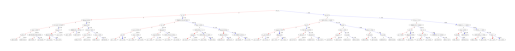

In [68]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plot_tree(model)
plt.show()

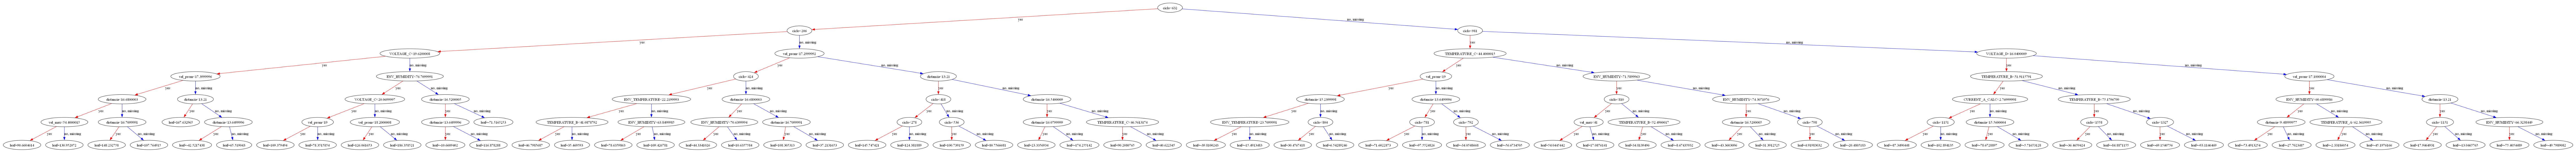

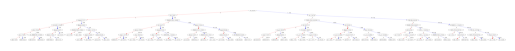

In [72]:
# plot single tree
plot_tree(model)
plt.show()